# Pymaceuticals Inc.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import sem

file1 = "clinicaltrial_data.csv"
file2 = "mouse_drug_data.csv"

clinical_trial_data = pd.read_csv(file1)

In [2]:
mouse_drug_data = pd.read_csv(file2) 
# Start with 250 mice. 10 drugs. Give each drug to 25 mice. 
# 10 different drugs x 25 mice per drug = 250 rows in mouse_drug_data. 

__Merge Datasets__

In [3]:
merged_data = pd.merge(clinical_trial_data, mouse_drug_data, on="Mouse ID")
merged_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Volume Changes

In [4]:
drug_timepoint_groupby = merged_data.groupby(['Drug', 'Timepoint'])

In [5]:
mean_tumor_volume = pd.DataFrame(drug_timepoint_groupby['Tumor Volume (mm3)'].mean()).reset_index()
mean_tumor_volume.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [6]:
mean_tumor_volume_pivot = mean_tumor_volume.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
mean_tumor_volume_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [7]:
standard_error = pd.DataFrame(drug_timepoint_groupby['Tumor Volume (mm3)'].sem()).reset_index()
standard_error.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [8]:
standard_error_pivot = standard_error.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
standard_error_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


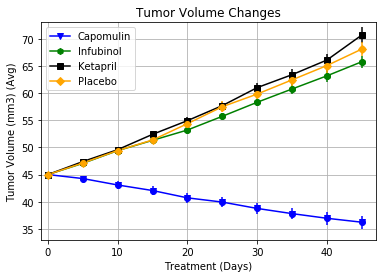

In [9]:
x_axis = list(np.arange(0, 50, 5))

y_axis = list(mean_tumor_volume_pivot['Capomulin'])
standard_errors = list(standard_error_pivot['Capomulin'])
plt.errorbar(x_axis, y_axis, standard_errors, fmt="o", color="blue")
plt.plot(x_axis, y_axis, marker="v",color="blue", linewidth=1.5, label="Capomulin")

y_axis = list(mean_tumor_volume_pivot['Infubinol'])
standard_errors = list(standard_error_pivot['Infubinol'])
plt.errorbar(x_axis, y_axis, standard_errors, fmt="o", color="green")
plt.plot(x_axis, y_axis, marker="h",color="green", linewidth=1.5, label="Infubinol")

y_axis = list(mean_tumor_volume_pivot['Ketapril'])
standard_errors = list(standard_error_pivot['Ketapril'])
plt.errorbar(x_axis, y_axis, standard_errors, fmt="o", color="black")
plt.plot(x_axis, y_axis, marker="s",color="black", linewidth=1.5, label="Ketapril")

y_axis = list(mean_tumor_volume_pivot['Placebo'])
standard_errors = list(standard_error_pivot['Placebo'])
plt.errorbar(x_axis, y_axis, standard_errors, fmt="o", color="orange")
plt.plot(x_axis, y_axis, marker="D",color="orange", linewidth=1.5, label="Placebo")

plt.grid()
plt.title("Tumor Volume Changes")
plt.xlabel("Treatment (Days)")
plt.ylabel("Tumor Volume (mm3) (Avg)")
plt.legend()
plt.xlim(-1, 47)
plt.ylim(33, 73)
plt.savefig("Tumor Volume Changes")
plt.show()

## Number of Metastatic  Sites Changes

In [10]:
mean_metsites_changes = pd.DataFrame(drug_timepoint_groupby['Metastatic Sites'].mean()).reset_index()
mean_metsites_changes.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [11]:
mean_metsites_changes_pivot = mean_metsites_changes.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')
mean_metsites_changes_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [12]:
standard_error = pd.DataFrame(drug_timepoint_groupby['Metastatic Sites'].sem()).reset_index()
standard_error.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [13]:
standard_error_pivot = standard_error.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')
standard_error_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


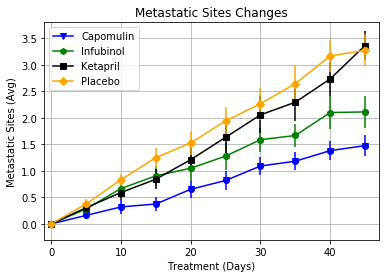

In [14]:
x_axis = list(np.arange(0, 50, 5))

y_axis = list(mean_metsites_changes_pivot['Capomulin'])
standard_errors = list(standard_error_pivot['Capomulin'])
plt.errorbar(x_axis, y_axis, standard_errors, fmt="o", color="blue")
plt.plot(x_axis, y_axis, marker="v",color="blue", linewidth=1.5, label="Capomulin")

y_axis = list(mean_metsites_changes_pivot['Infubinol'])
standard_errors = list(standard_error_pivot['Infubinol'])
plt.errorbar(x_axis, y_axis, standard_errors, fmt="o", color="green")
plt.plot(x_axis, y_axis, marker="h",color="green", linewidth=1.5, label="Infubinol")

y_axis = list(mean_metsites_changes_pivot['Ketapril'])
standard_errors = list(standard_error_pivot['Ketapril'])
plt.errorbar(x_axis, y_axis, standard_errors, fmt="o", color="black")
plt.plot(x_axis, y_axis, marker="s",color="black", linewidth=1.5, label="Ketapril")

y_axis = list(mean_metsites_changes_pivot['Placebo'])
standard_errors = list(standard_error_pivot['Placebo'])
plt.errorbar(x_axis, y_axis, standard_errors, fmt="o", color="orange")
plt.plot(x_axis, y_axis, marker="D",color="orange", linewidth=1.5, label="Placebo")

plt.grid()
plt.title("Metastatic Sites Changes")
plt.xlabel("Treatment (Days)")
plt.ylabel("Metastatic Sites (Avg)")
plt.legend()
plt.xlim(-1, 47)
plt.ylim(-0.3, 3.8)
plt.savefig("Metastatic Sites Changes")
plt.show()

## Survival Rate

In [15]:
mice_alive = pd.DataFrame(drug_timepoint_groupby['Mouse ID'].count()).reset_index()
mice_alive = mice_alive.rename(columns={"Mouse ID": "# Mice Alive"})

mice_alive.head()

,Drug,Timepoint,# Mice Alive
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [16]:
total_mice_Capomulin = merged_data[merged_data['Drug'] == 'Capomulin']['Mouse ID'].nunique()
total_mice_Infubinol = merged_data[merged_data['Drug'] == 'Infubinol']['Mouse ID'].nunique()
total_mice_Ketapril = merged_data[merged_data['Drug'] == 'Ketapril']['Mouse ID'].nunique()
total_mice_Placebo = merged_data[merged_data['Drug'] == 'Placebo']['Mouse ID'].nunique()

In [17]:
mice_alive_pivot = mice_alive.pivot(index='Timepoint', columns='Drug', values='# Mice Alive')
mice_alive_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


               Capomulin  Infubinol  Ketapril  Placebo
Treatment Day                                         
0                  100.0      100.0     100.0    100.0
5                  100.0      100.0      92.0     96.0
10                 100.0       84.0      88.0     96.0
15                  96.0       84.0      76.0     80.0
20                  92.0       80.0      76.0     76.0
25                  88.0       72.0      76.0     68.0
30                  88.0       68.0      72.0     60.0
35                  88.0       48.0      68.0     56.0
40                  84.0       40.0      60.0     48.0
45                  84.0       36.0      44.0     44.0


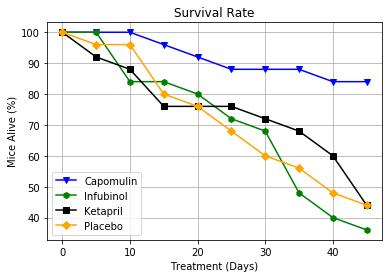

In [18]:
x_axis = list(np.arange(0, 50, 5))

y_axis_cap = list(mice_alive_pivot['Capomulin'] / total_mice_Capomulin * 100)
plt.plot(x_axis, y_axis_cap, marker="v",color="blue", linewidth=1.5, label="Capomulin")

y_axis_inf = list(mice_alive_pivot['Infubinol'] / total_mice_Infubinol * 100)
plt.plot(x_axis, y_axis_inf, marker="h",color="green", linewidth=1.5, label="Infubinol")

y_axis_ket = list(mice_alive_pivot['Ketapril'] / total_mice_Ketapril * 100)
plt.plot(x_axis, y_axis_ket, marker="s",color="black", linewidth=1.5, label="Ketapril")

y_axis_pla = list(mice_alive_pivot['Placebo'] / total_mice_Placebo * 100)
plt.plot(x_axis, y_axis_pla, marker="D",color="orange", linewidth=1.5, label="Placebo")

perc_survival_rates = pd.DataFrame({
    "Treatment Day": x_axis,
    "Capomulin": y_axis_cap,
    "Infubinol": y_axis_inf,
    "Ketapril": y_axis_ket,
    "Placebo": y_axis_pla
})

perc_survival_rates = perc_survival_rates.set_index('Treatment Day')
print(perc_survival_rates)

plt.grid()
plt.title("Survival Rate")
plt.xlabel("Treatment (Days)")
plt.ylabel("Mice Alive (%)")
plt.legend()
plt.savefig("Mice Survival Rate")
plt.show()

## Total % Tumor Volume Change

In [19]:
# Sort by mouse id and timepoint in order to calculate tumor changes across timepoints.
sorted_data = merged_data.sort_values(by=['Mouse ID', 'Timepoint'])

In [20]:
# Calculate tumor change across timepoints. 

prior_mouse = ""
tumor_changes = []
perc_tumor_changes = []

for index, row in sorted_data.iterrows():
    if row[0] != prior_mouse:
        initial_tumor_volume = row[2]
        prior_tumor_volume = initial_tumor_volume
    
    tumor_increase_decrease = row[2] - prior_tumor_volume
    tumor_changes.append(tumor_increase_decrease)
    perc_tumor_changes.append(((row[2] - initial_tumor_volume) / initial_tumor_volume) * 100)
    
    prior_mouse = row[0]
    prior_tumor_volume = row[2]    

In [21]:
# Add columns to dataframe
sorted_data['Tumor Change'] = tumor_changes
sorted_data['% Tumor Change'] = perc_tumor_changes

sorted_data.head(10)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug,Tumor Change,% Tumor Change
911,a203,0,45.000000,0,Infubinol,0.000000,0.000000
912,a203,5,48.508468,0,Infubinol,3.508468,7.796596
913,a203,10,51.852437,1,Infubinol,3.343969,15.227638
914,a203,15,52.777870,1,Infubinol,0.925433,17.284157
915,a203,20,55.173336,1,Infubinol,2.395466,22.607414
916,a203,25,56.793208,1,Infubinol,1.619872,26.207130
917,a203,30,59.523197,1,Infubinol,2.729989,32.273772
918,a203,35,61.931650,2,Infubinol,2.408453,37.625889
919,a203,40,63.593490,2,Infubinol,1.661840,41.318867
920,a203,45,67.973419,2,Infubinol,4.379929,51.052042


In [22]:
# Only want percent changes at day 45, to get percent change across all 45 days.
change_percent_by_drug = sorted_data[sorted_data['Timepoint'] == 45].groupby('Drug')['% Tumor Change'].mean().reset_index()
change_percent_by_drug

,Drug,% Tumor Change
0,Capomulin,-19.475303
1,Ceftamin,42.516492
2,Infubinol,46.123472
3,Ketapril,57.028795
4,Naftisol,53.923347
5,Placebo,51.297960
6,Propriva,47.241175
7,Ramicane,-22.320900
8,Stelasyn,52.085134
9,Zoniferol,46.579751


In [23]:
positions =[]
drugs=[]

In [24]:
def get_color(mean_perc_tumor_change):
    if mean_perc_tumor_change > 0:
        bar_color = "red"
    else:
        bar_color = "green"
        
    return bar_color   

In [25]:
def create_barchart_column(drug, position):
    drugs.append(drug)
    positions.append(position)
    
    x_axis = np.arange(position, position + 1)
    y_axis = list(change_percent_by_drug[change_percent_by_drug['Drug'] == drug]['% Tumor Change'])
    plt.bar(x_axis, y_axis, color=get_color(y_axis[0]), align='center', width=1)
    
    if get_color(y_axis[0]) == 'red':
        y_pos = 5
    else:
        y_pos = -5
    
    label = str(round(y_axis[0])) + "%"
    plt.text (position, y_pos, label, fontsize=12, horizontalalignment='center')

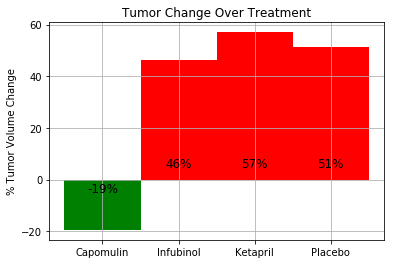

In [26]:
create_barchart_column ('Capomulin', 1)
create_barchart_column ('Infubinol', 2)
create_barchart_column ('Ketapril', 3)
create_barchart_column ('Placebo', 4)

plt.grid()
plt.title("Tumor Change Over Treatment")
plt.ylabel("% Tumor Volume Change")
plt.xticks(positions, drugs)
plt.yticks(np.arange(-20, 61, 20))
plt.savefig("Percent Tumor Volume Change")
plt.show()

## Observable Trends

#### 1. 

Capomulin had the highest survival rate (84%), the lowest average of metastatic sites (1.467) at the end of the 45-day treatment, and was the only drug that caused a reduction in tumor volume (reducing from an average of 45 mm3 to 36.23 mm3). It was, by far, the most effective drug in terms of survival rate, number of metastatic sites, and tumor volume reduction.

#### 2.
At the end of the 45-day treatment, Ketapril produced the highest average of metastatic sites (3.36), produced the largest average tumor volume (70.66 mm3), and tied as the 2nd lowest survival rate (44%). It showed to be a very ineffective drug with regards to number of metastatic sites, tumor volume, and survival rate, when used for 45-days.

#### 3.

On the other hand, Ketapril's survival rate remained consistent (76%) from day 15 to 25, and then decreased with every additional treatment. It's number of metastatic sites reached an average of 1.63 mm3 at day 25, and then continued to increase with every additional treatment. Further studies would need to be done to determine whether Ketapril could be effective for a shorter duration of time.
